In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = ('data/measurements.csv')

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [5]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(388, 12)

In [7]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
numeric_cols

['speed', 'temp_outside', 'AC', 'rain', 'sun']

In [8]:
categorical_cols = df.select_dtypes(exclude="number").columns.tolist()
categorical_cols

['distance',
 'consume',
 'temp_inside',
 'specials',
 'gas_type',
 'refill liters',
 'refill gas']

In [9]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [10]:
# drop specials column
df.drop("specials", axis=1, inplace=True)

In [11]:
# format Total_amount, column to be two decimal places
df["temp_inside"] = df["temp_inside"].map('{:.2}'.format)
df["temp_inside"]

0      21
1      21
2      21
3      21
4      21
       ..
383    24
384    25
385    25
386    25
387    25
Name: temp_inside, Length: 388, dtype: object

In [12]:
# fill the na values in the temp_insode column with the mean
df["temp_inside"] = pd.to_numeric(df["temp_inside"],errors="coerce").fillna(df["temp_inside"].astype(float).mean()).astype(int)

In [13]:
df["temp_inside"]

0      21
1      21
2      21
3      21
4      21
       ..
383    24
384    25
385    25
386    25
387    25
Name: temp_inside, Length: 388, dtype: int32

In [14]:
# replace the "," with "." in distance and consume
df["distance"]=df["distance"].str.replace(',', '.')
df["consume"]=df["consume"].str.replace(',', '.')
df["refill liters"]=df["refill liters"].str.replace(',', '.')

In [15]:
# convert to float
df["distance"]=df["distance"].astype(float)
df["consume"]=df["consume"].astype(float)
df["refill liters"]=df["refill liters"].astype(float)

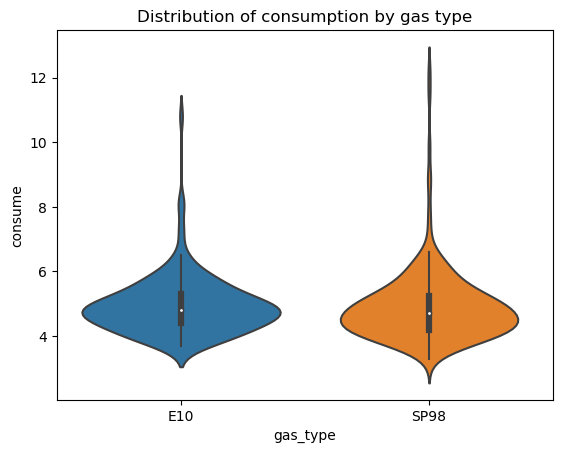

In [21]:
# visualization between gas type and consume
sns.violinplot(x='gas_type', y='consume', data=df)
plt.title('Distribution of consumption by gas type')
plt.show()

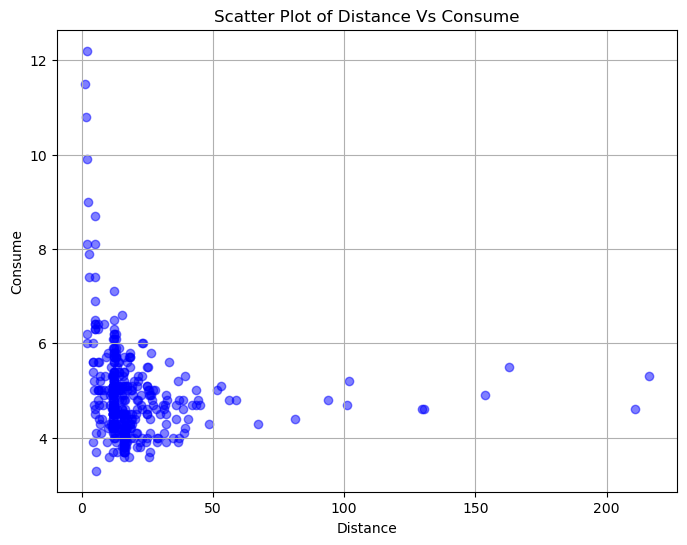

In [27]:
# visual for distance and consume
plt.figure(figsize=(8, 6))
plt.scatter(df["distance"], df["consume"], color='blue', alpha=0.5)  # alpha controls transparency
plt.title('Scatter Plot of Distance Vs Consume')
plt.xlabel('Distance')
plt.ylabel('Consume')
plt.grid(True)
plt.show()

C:\Users\azmac\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


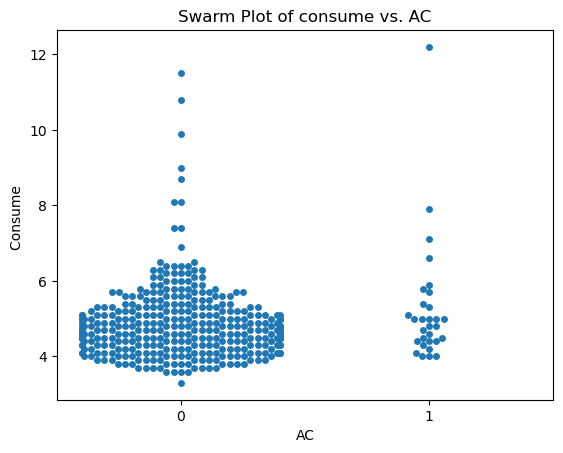

In [40]:
# visual for consume and AC
sns.swarmplot(x="AC", y="consume", data=df)
plt.title('Swarm Plot of consume vs. AC')
plt.xlabel('AC')
plt.ylabel('Consume ')
plt.show()

Text(0.5, 1.0, 'speed & consume')

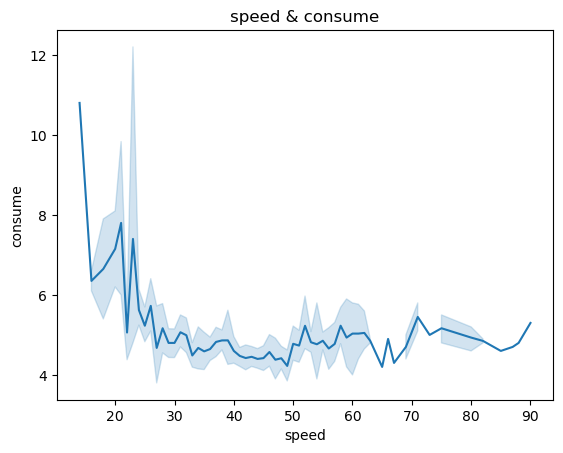

In [42]:
# Visual for speed and consume
sns.lineplot(x=df['speed'], y=df['consume'])
plt.title("speed & consume")

Text(0.5, 1.0, 'temp_outside & consume')

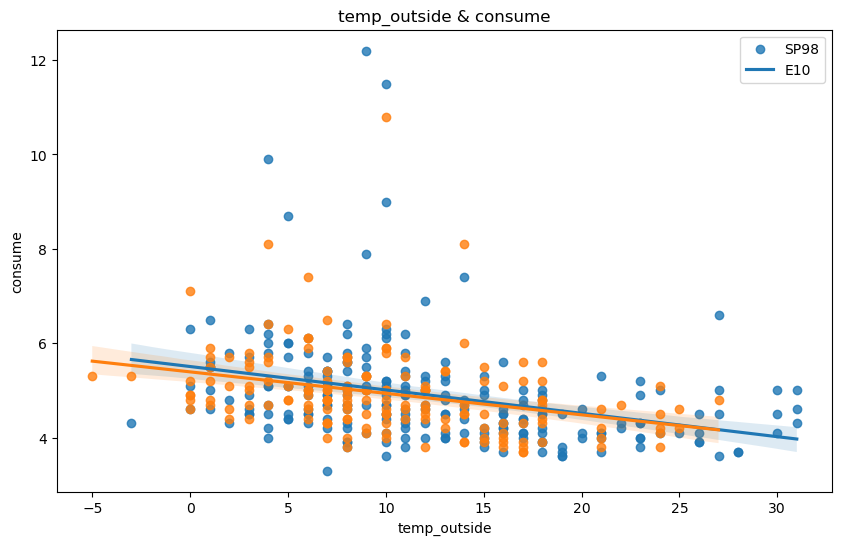

In [44]:
# outside temp and consume
plt.figure(figsize=(10,6))
sns.regplot(x=df[df["gas_type"]=="SP98"]['temp_outside'], y=df[df["gas_type"]=="SP98"]['consume'])
sns.regplot(x=df[df["gas_type"]=="E10"]['temp_outside'], y=df[df["gas_type"]=="E10"]['consume'])
plt.legend(["SP98","E10"])
plt.xlabel("temp_outside")
plt.ylabel("consume")
plt.title("temp_outside & consume")


The best combustible to use depends on several factors. The consumption of gas in low tempetartures seems to be the same for both types of gas. When the distance increases there is no significant change in the consumption of either type of gas. There is also no significant increase in consumption when it comes to the speed and the consumption.Overall, it depends on where the vehicle will be traveling to and make the best decision based on the weather conditions to find the best type of gas for a specific route and time of year that the trip will be made.